<a href="https://colab.research.google.com/github/durga41003/Data-Science/blob/main/Home_Price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('/content/train.csv')

In [6]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


<Axes: xlabel='POSTED_BY', ylabel='count'>

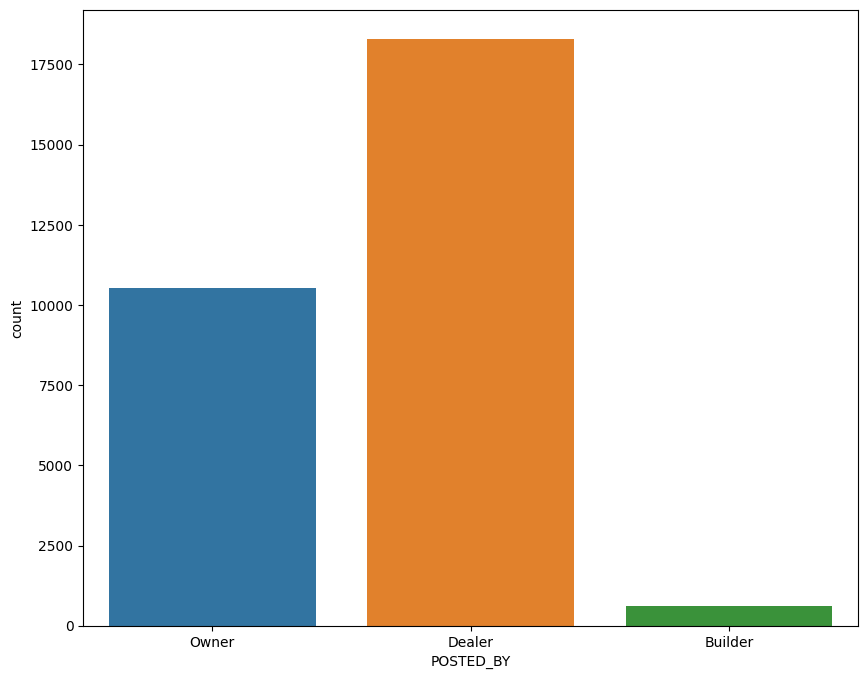

In [7]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'POSTED_BY')

In [8]:
for column in df:
  uniq_val = np.unique(df[column])
  np_val = len(uniq_val)
  if np_val < 10:
    print("The number of values for feature {} is: {} -- {}".format(column, np_val, uniq_val))
  else:
    print("The number of values for feature {} is: {}".format(column, np_val)) 

The number of values for feature POSTED_BY is: 3 -- ['Builder' 'Dealer' 'Owner']
The number of values for feature UNDER_CONSTRUCTION is: 2 -- [0 1]
The number of values for feature RERA is: 2 -- [0 1]
The number of values for feature BHK_NO. is: 16
The number of values for feature BHK_OR_RK is: 2 -- ['BHK' 'RK']
The number of values for feature SQUARE_FT is: 19561
The number of values for feature READY_TO_MOVE is: 2 -- [0 1]
The number of values for feature RESALE is: 2 -- [0 1]
The number of values for feature ADDRESS is: 6899
The number of values for feature LONGITUDE is: 4087
The number of values for feature LATITUDE is: 4078
The number of values for feature TARGET(PRICE_IN_LACS) is: 1172


In [9]:
df['CITY'] = df['ADDRESS'].str.split(",").str[-1]
df = df.drop('ADDRESS', axis = 1)

<ipython-input-10-72d556fb1556>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TARGET(PRICE_IN_LACS)'])


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

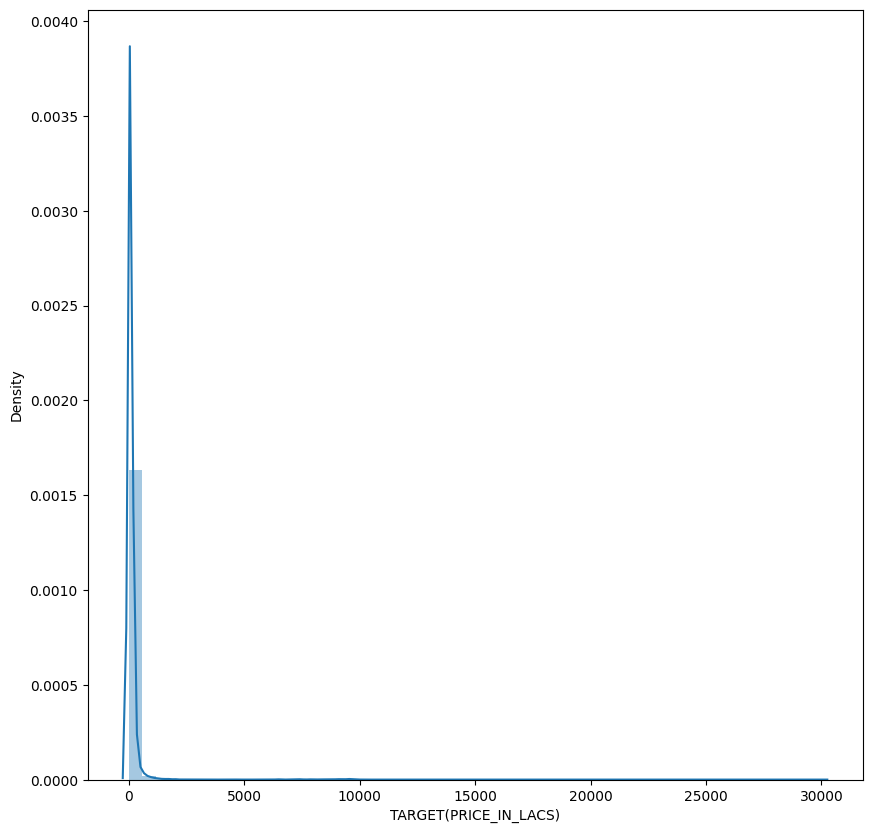

In [10]:
plt.figure(figsize = (10,10))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

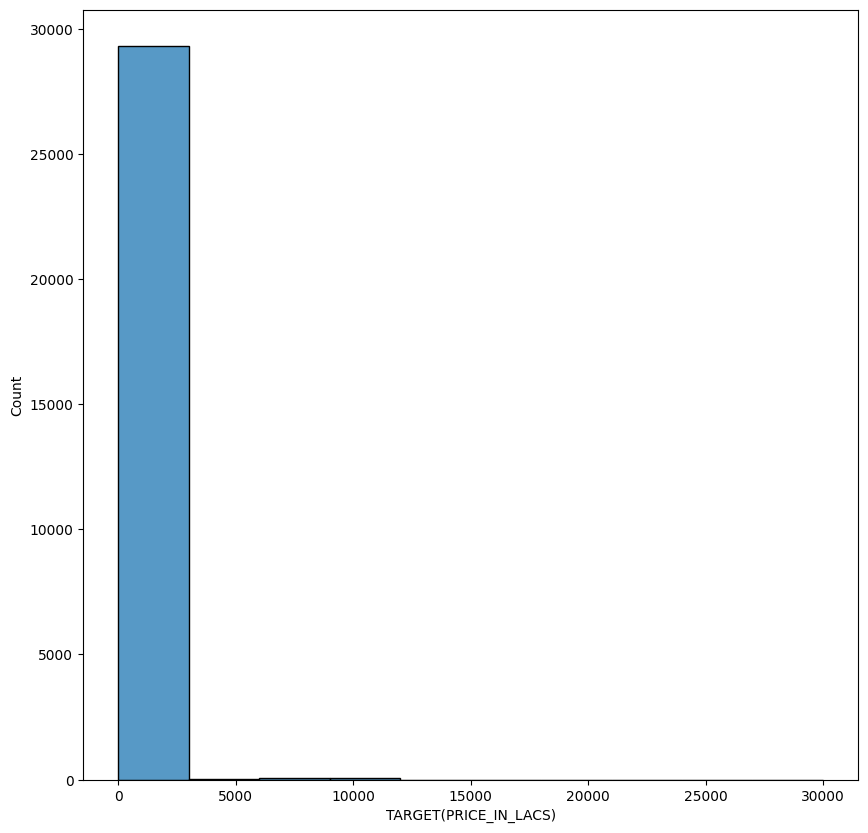

In [11]:
plt.figure(figsize = (10,10))
sns.histplot(df['TARGET(PRICE_IN_LACS)'], bins = 10)

In [12]:
df['SQUARE_FT'] = np.log(df['SQUARE_FT'])


<Axes: xlabel='LATITUDE', ylabel='Count'>

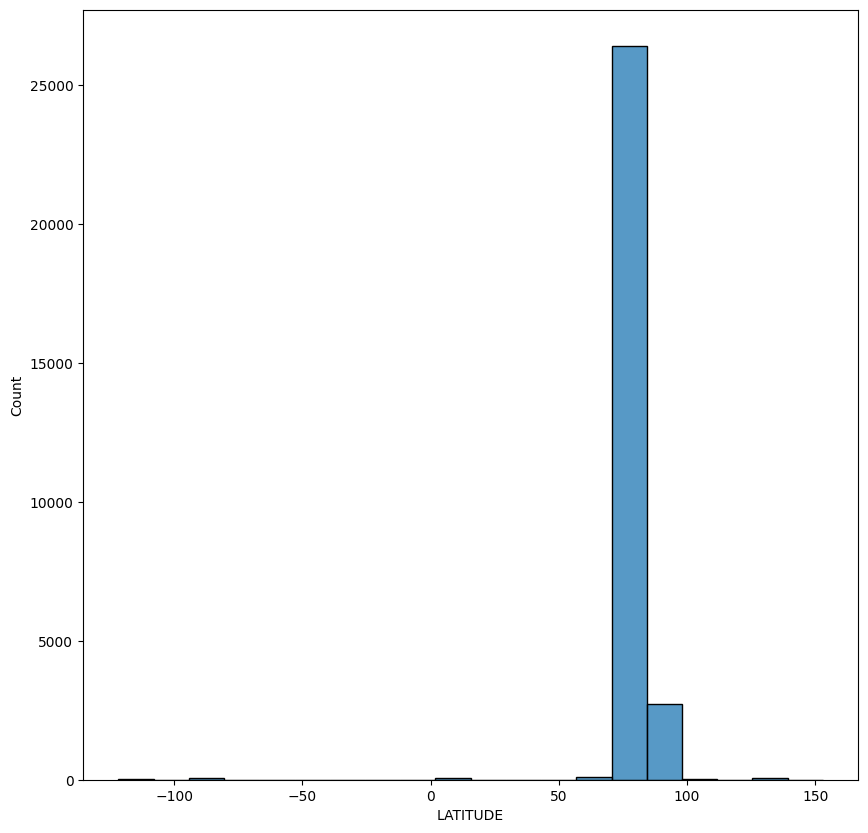

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(df['LATITUDE'], bins = 20)

In [14]:
df['LONGITUDE'] = np.log(df['LONGITUDE'] )
df['LATITUDE'] = np.log(df['LATITUDE'] )

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata


<Axes: xlabel='BHK_OR_RK', ylabel='count'>

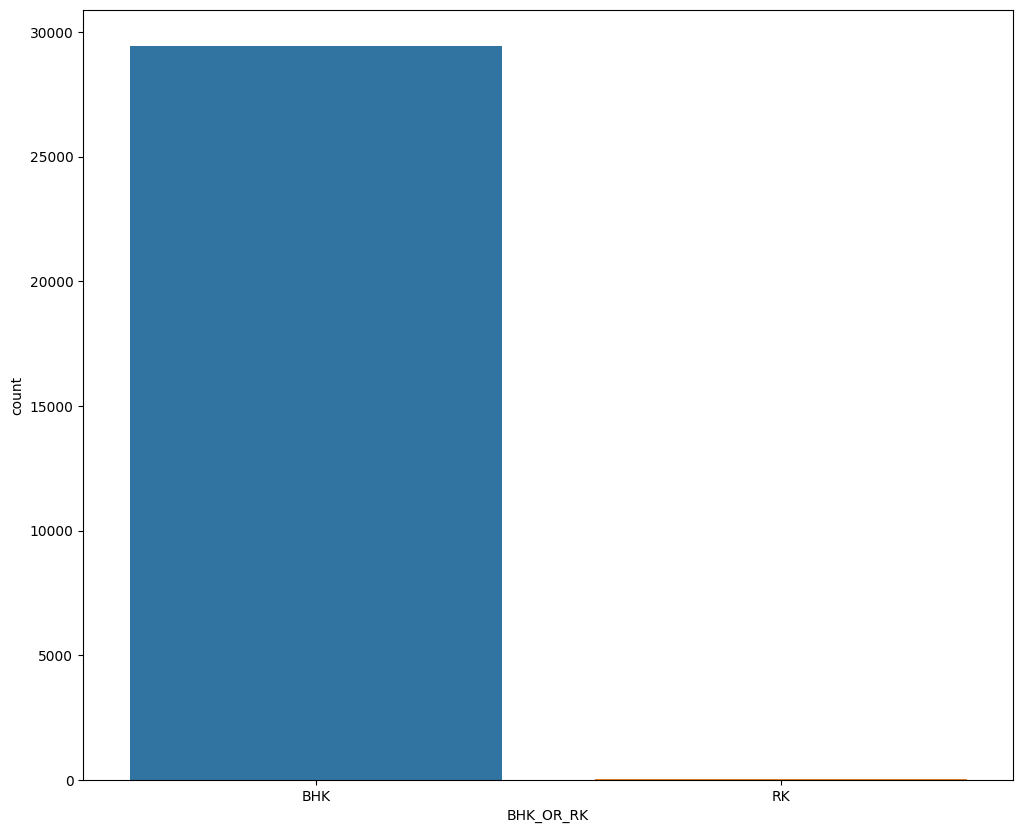

In [16]:
plt.figure(figsize = (12,10))
sns.countplot(data = df, x = 'BHK_OR_RK')

In [17]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
df['city_tier'] = df['CITY'].apply(map_city)

In [18]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore,tier1
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore,tier2
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore,tier1
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad,tier2
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata,tier1


In [19]:
df = df.drop('CITY', axis = 1)
features = ['POSTED_BY', 'BHK_OR_RK', 'city_tier']
new_df = pd.get_dummies(df, columns = features)
new_df.isna().sum()

UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
LONGITUDE                12
LATITUDE                 83
TARGET(PRICE_IN_LACS)     0
POSTED_BY_Builder         0
POSTED_BY_Dealer          0
POSTED_BY_Owner           0
BHK_OR_RK_BHK             0
BHK_OR_RK_RK              0
city_tier_tier1           0
city_tier_tier2           0
city_tier_tier3           0
dtype: int64

In [20]:
new_df.dropna(subset=['LATITUDE'], how='all', inplace=True)
new_df.dropna(subset=['LONGITUDE'], how='all', inplace=True)

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

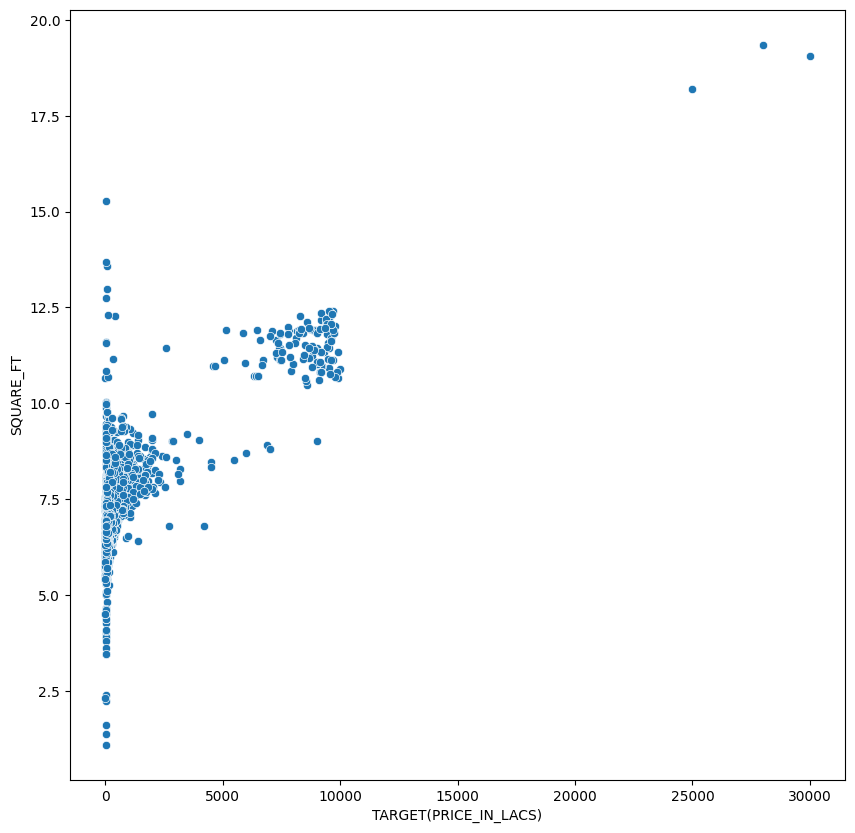

In [21]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT')

In [22]:
X = new_df.drop('TARGET(PRICE_IN_LACS)', axis = 1)
y = new_df['TARGET(PRICE_IN_LACS)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train

29378    120.0
14660    470.0
16097     75.0
12025     60.0
5055      51.0
         ...  
12157     50.0
24495    100.0
14189     38.9
23385     85.2
5657      65.0
Name: TARGET(PRICE_IN_LACS), Length: 20549, dtype: float64

In [23]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(lr.score(X_train, y_train))
print(lr.score(X_valid, y_valid))

0.5239038898608588
0.5182440950876861


**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_valid)

print('Random Forest: ', r2_score(y_valid, preds))

Random Forest:  0.9536009853458558


**Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

preds = dt.predict(X_train)

r2_score(y_train, preds)

0.9999711666333725